<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Pipeline de Dados do Telegram II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Ingestão;</li>
  <li>ETL;</li>
  <li>Apresentação;</li>
  <li>Storytelling.</li>
</ol>

---

# **Exercícios**

## 1\. Ingestão

Replique as atividades da aula 1.

In [ ]:
%%writefile telegram.json
 {
  "ok": true,
  "result": [
    {
      "update_id": 883492825,
      "message": {
        "message_id": 4,
        "from": {
          "id": 7423182418,
          "is_bot": false,
          "first_name": "Diogo",
          "last_name": "Souza",
          "language_code": "en"
        },
        "chat": {
          "id": -1002154771515,
          "title": "Projeto EBAC",
          "type": "supergroup"
        },
        "date": 1722263159,
        "text": "Buenos dias"
      }
    }
  ]
}

Writing telegram.json


In [ ]:
import json
with open('telegram.json', mode='r', encoding='utf8') as fp:
    data = json.load(fp)
data = data["result"][0]["message"]
print(json.dumps(data, indent=2))

{
  "message_id": 4,
  "from": {
    "id": 7423182418,
    "is_bot": false,
    "first_name": "Diogo",
    "last_name": "Souza",
    "language_code": "en"
  },
  "chat": {
    "id": -1002154771515,
    "title": "Projeto EBAC",
    "type": "supergroup"
  },
  "date": 1722263159,
  "text": "Buenos dias"
}


In [ ]:
from datetime import datetime

date = datetime.now().strftime('%Y-%m-%d')
timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

parsed_data = dict()



In [ ]:
for key, value in data.items():
    if key == 'from':
        for k, v in data[key].items():
            if k in ['id', 'is_bot', 'first_name']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]
    elif key == 'chat':
        for k, v in data[key].items():
            if k in ['id', 'type']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]
    elif key in ['message_id', 'date', 'text']:
        parsed_data[key] = [value]
if not 'text' in parsed_data.keys():
    parsed_data['text'] = [None]
parsed_data['context_date'] = [date]
parsed_data['context_timestamp'] = [timestamp]

In [ ]:
for k, v in parsed_data.items(): print(f"{k}: {v}")

message_id: [4]
user_id: [7423182418]
user_is_bot: [False]
user_first_name: ['Diogo']
chat_id: [-1002154771515]
chat_type: ['supergroup']
date: [1722263159]
text: ['Buenos dias']
context_date: ['2024-07-29']
context_timestamp: ['2024-07-29 14:48:30']


In [ ]:
import pyarrow as pa
table = pa.Table.from_pydict(mapping=parsed_data)

In [ ]:
table

pyarrow.Table
message_id: int64
user_id: int64
user_is_bot: bool
user_first_name: string
chat_id: int64
chat_type: string
date: int64
text: string
context_date: string
context_timestamp: string
----
message_id: [[4]]
user_id: [[7423182418]]
user_is_bot: [[false]]
user_first_name: [["Diogo"]]
chat_id: [[-1002154771515]]
chat_type: [["supergroup"]]
date: [[1722263159]]
text: [["Buenos dias"]]
context_date: [["2024-07-29"]]
context_timestamp: [["2024-07-29 14:48:30"]]

In [ ]:
#Telegram
from getpass import getpass
token = getpass()


··········


In [ ]:
 import json
 import requests
 base_url = f'https://api.telegram.org/bot{token}'

In [ ]:
response = requests.get(url=f'{base_url}/getMe')
print(f'{base_url}/getMe')
print(json.dumps(json.loads(response.text), indent=2))

https://api.telegram.org/bot7445453356:AAE0h0m6IOBXH-EoNzDgQwPrYB-QmZb0nU0/getMe
{
  "ok": true,
  "result": {
    "id": 7445453356,
    "is_bot": true,
    "first_name": "Projeto EBAC",
    "username": "projeto42_ebac_bot",
    "can_join_groups": false,
    "can_read_all_group_messages": false,
    "supports_inline_queries": false,
    "can_connect_to_business": false
  }
}


In [ ]:
response = requests.get(url=f'{base_url}/getUpdates')
print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": [
    {
      "update_id": 883492825,
      "message": {
        "message_id": 4,
        "from": {
          "id": 7423182418,
          "is_bot": false,
          "first_name": "Diogo",
          "last_name": "Souza",
          "language_code": "en"
        },
        "chat": {
          "id": -1002154771515,
          "title": "Projeto EBAC",
          "type": "supergroup"
        },
        "date": 1722263159,
        "text": "Buenos dias"
      }
    }
  ]
}


1.1. Crie um `bucket` no `AWS S3` para o armazenamento de dados crus, não se esqueça de adicionar o sufixo `-raw`.

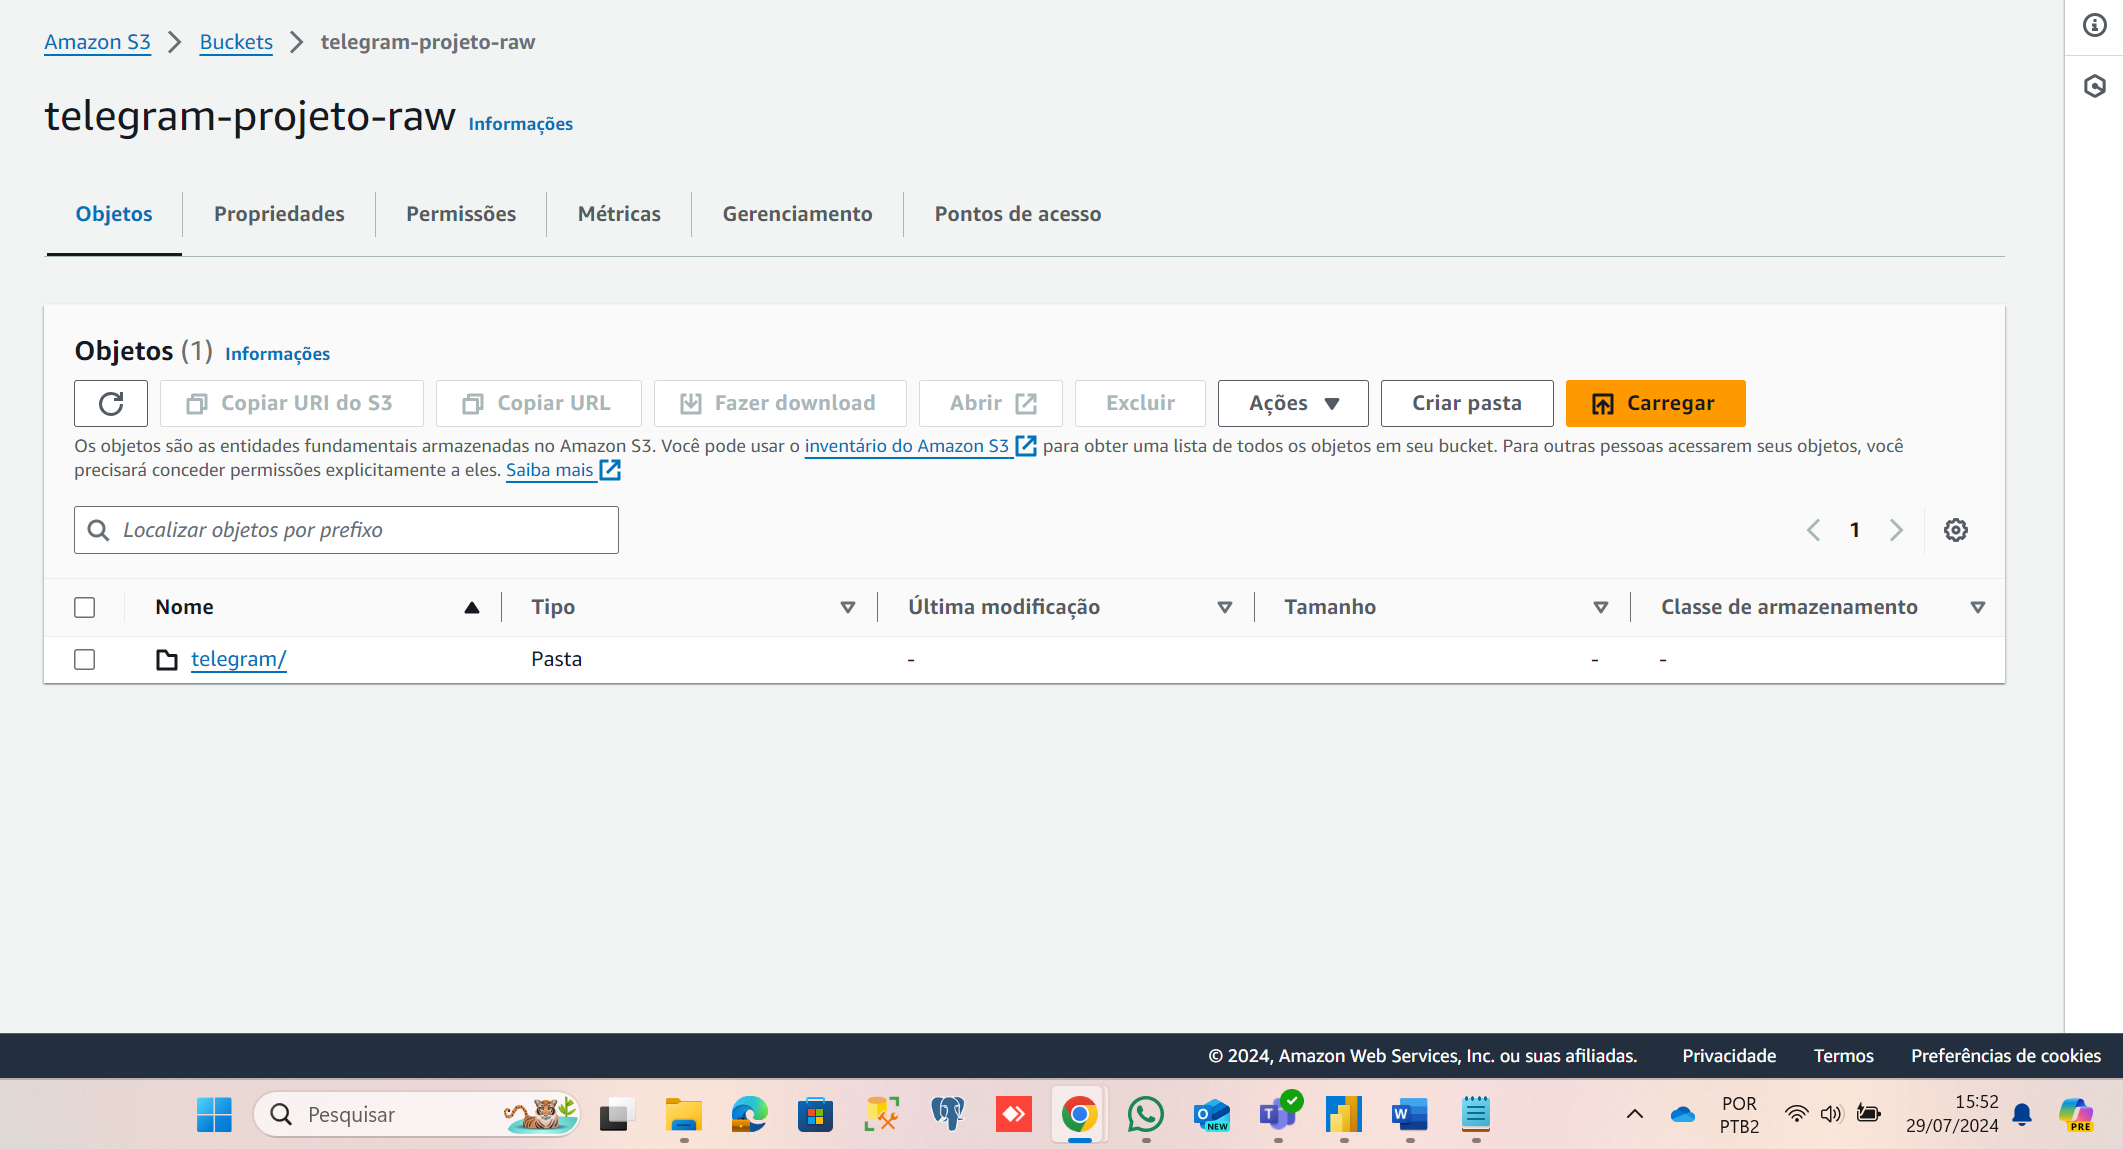

1.2. Crie uma função no `AWS Lambda` para recebimento das mensagens e armazenamento no formato JSON no `bucket` de dados crus. Não se esqueça de configurar as variáveis de ambiente e de adicionar as permissão de interação com `AWS S3` no `AWS IAM`.

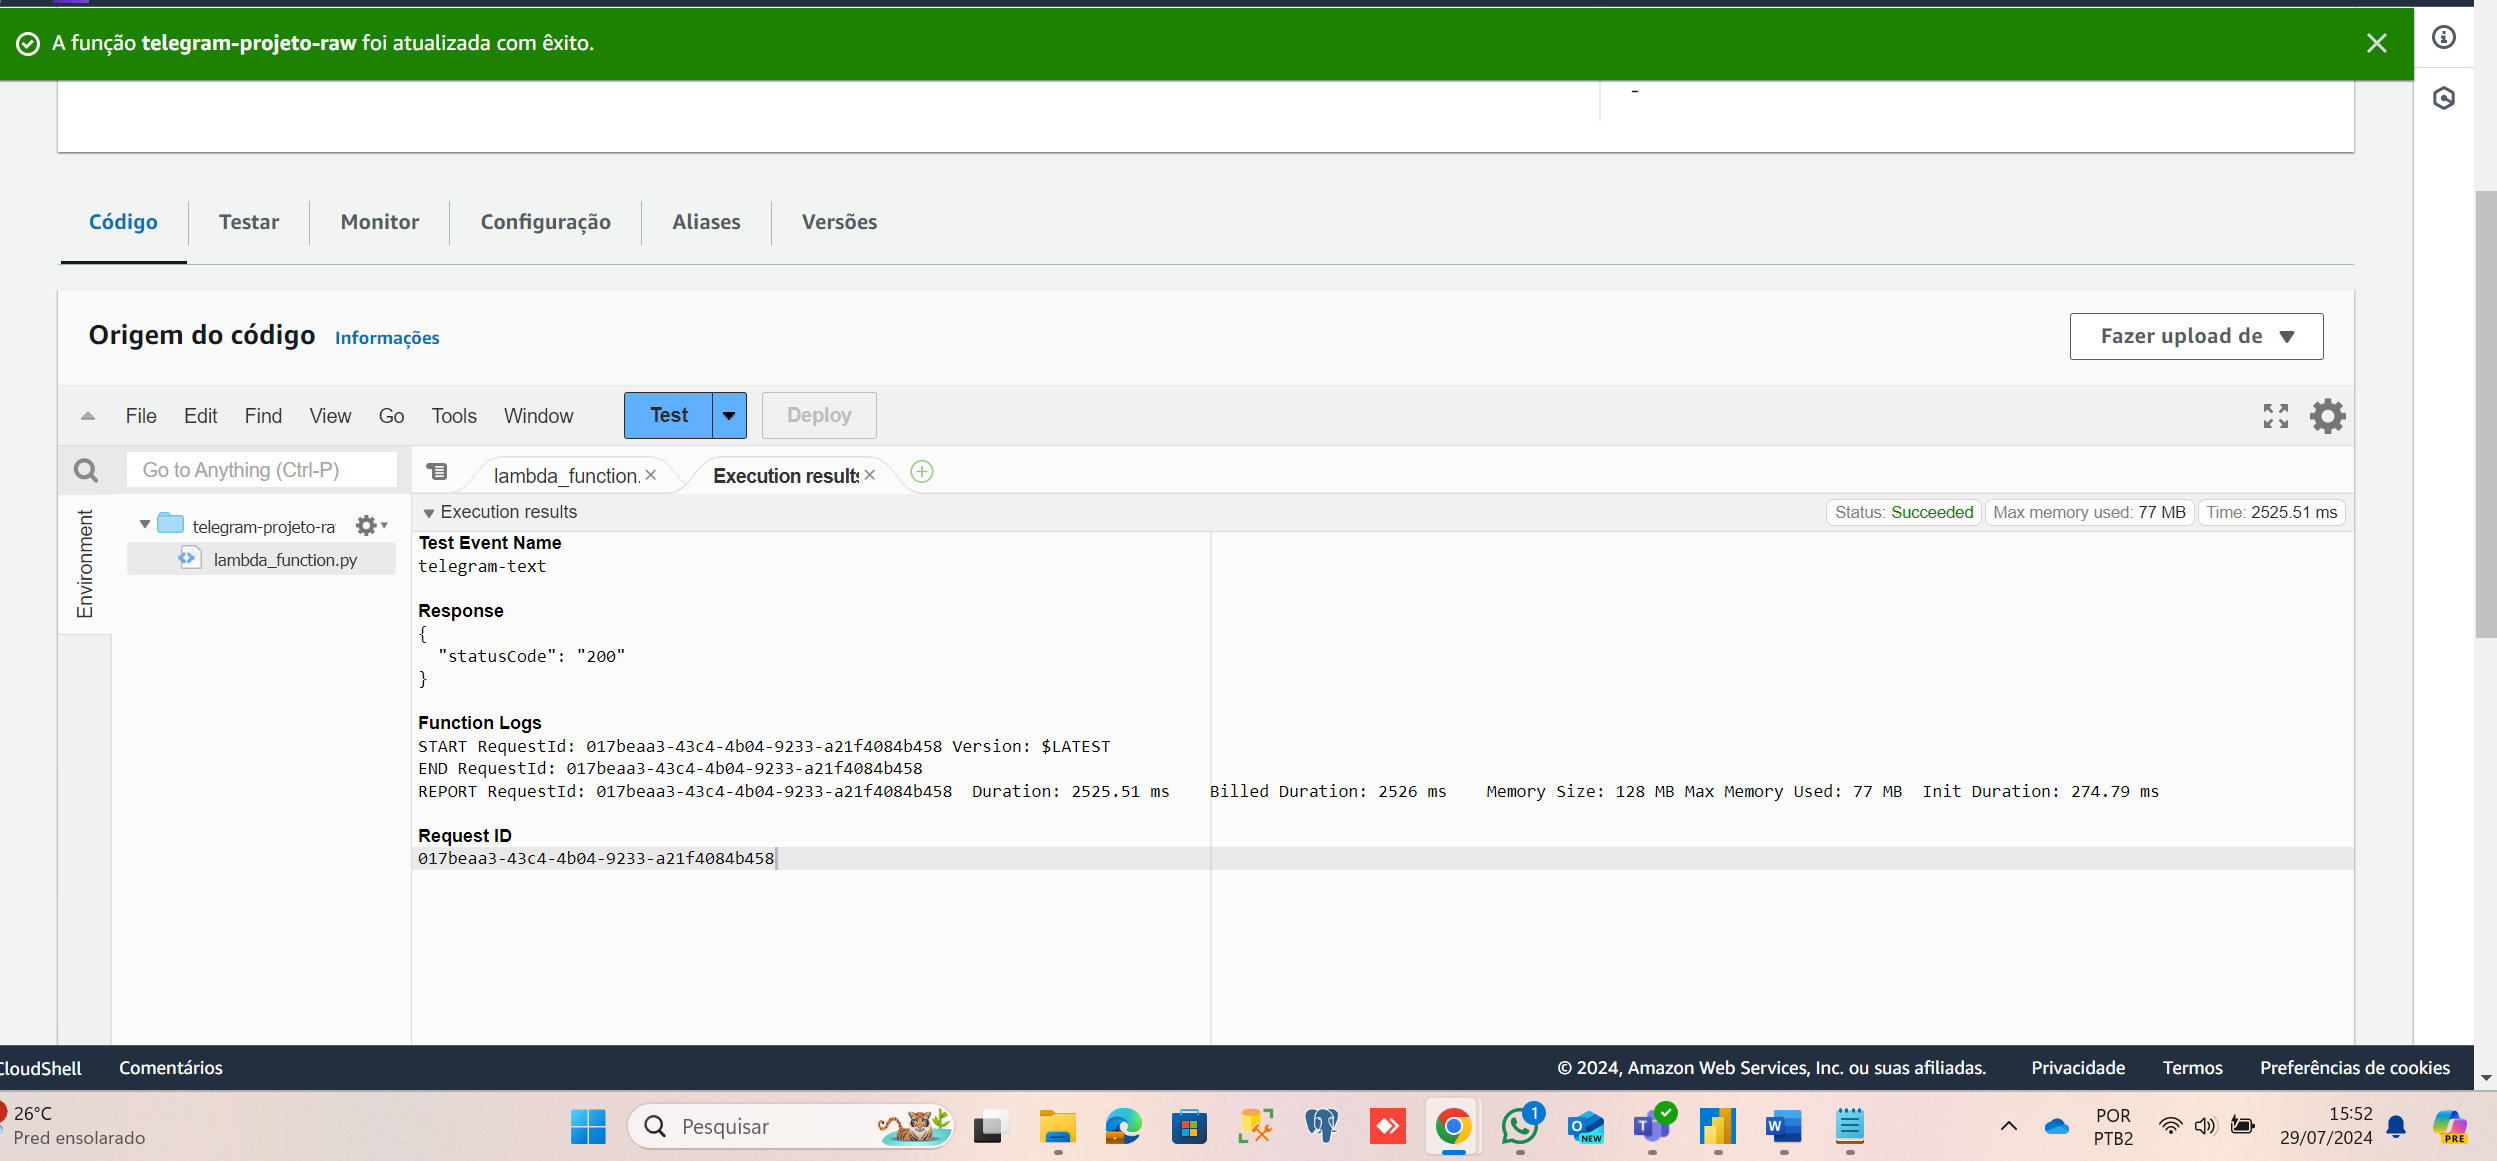

> **Nota**: Para testar a função com evento do próprio `AWS Lambda`, substitua o código `message = json.loads(event["body"])` por `message = event`. Lembre-se que o primeiro só faz sentido na integração com o `AWS API Gateway`.

1.3. Crie uma API no `AWS API Gateway` a conecte a função do `AWS Lambda`, conforme apresentado na aula.

> **Nota**: não disponibilize o endereço da API gerada.

1.4. Configura o *webhook* do *bot* através do método `setWebhook` da API de *bots* do **Telegram**. utilize o endereço da API criada no `AWS API Gateway`. Utilize o método `getWebhookInfo` para consultar a integração.

In [ ]:
aws_api_gateway_url = getpass()

··········


In [ ]:
response = requests.get(url=f'{base_url}/setWebhook?url={aws_api_gateway_url}')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": true,
  "description": "Webhook was set"
}


In [ ]:
response = requests.get(url=f'{base_url}/getWebhookInfo')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": {
    "url": "https://of49u3pqpe.execute-api.sa-east-1.amazonaws.com/dev",
    "has_custom_certificate": false,
    "pending_update_count": 1,
    "last_error_date": 1722280789,
    "last_error_message": "Wrong response from the webhook: 500 Internal Server Error",
    "max_connections": 40,
    "ip_address": "54.94.237.42"
  }
}


> **Nota**: não disponibilize o *token* de acesso ao seu *bot* da API de *bots* do **Telegram**.

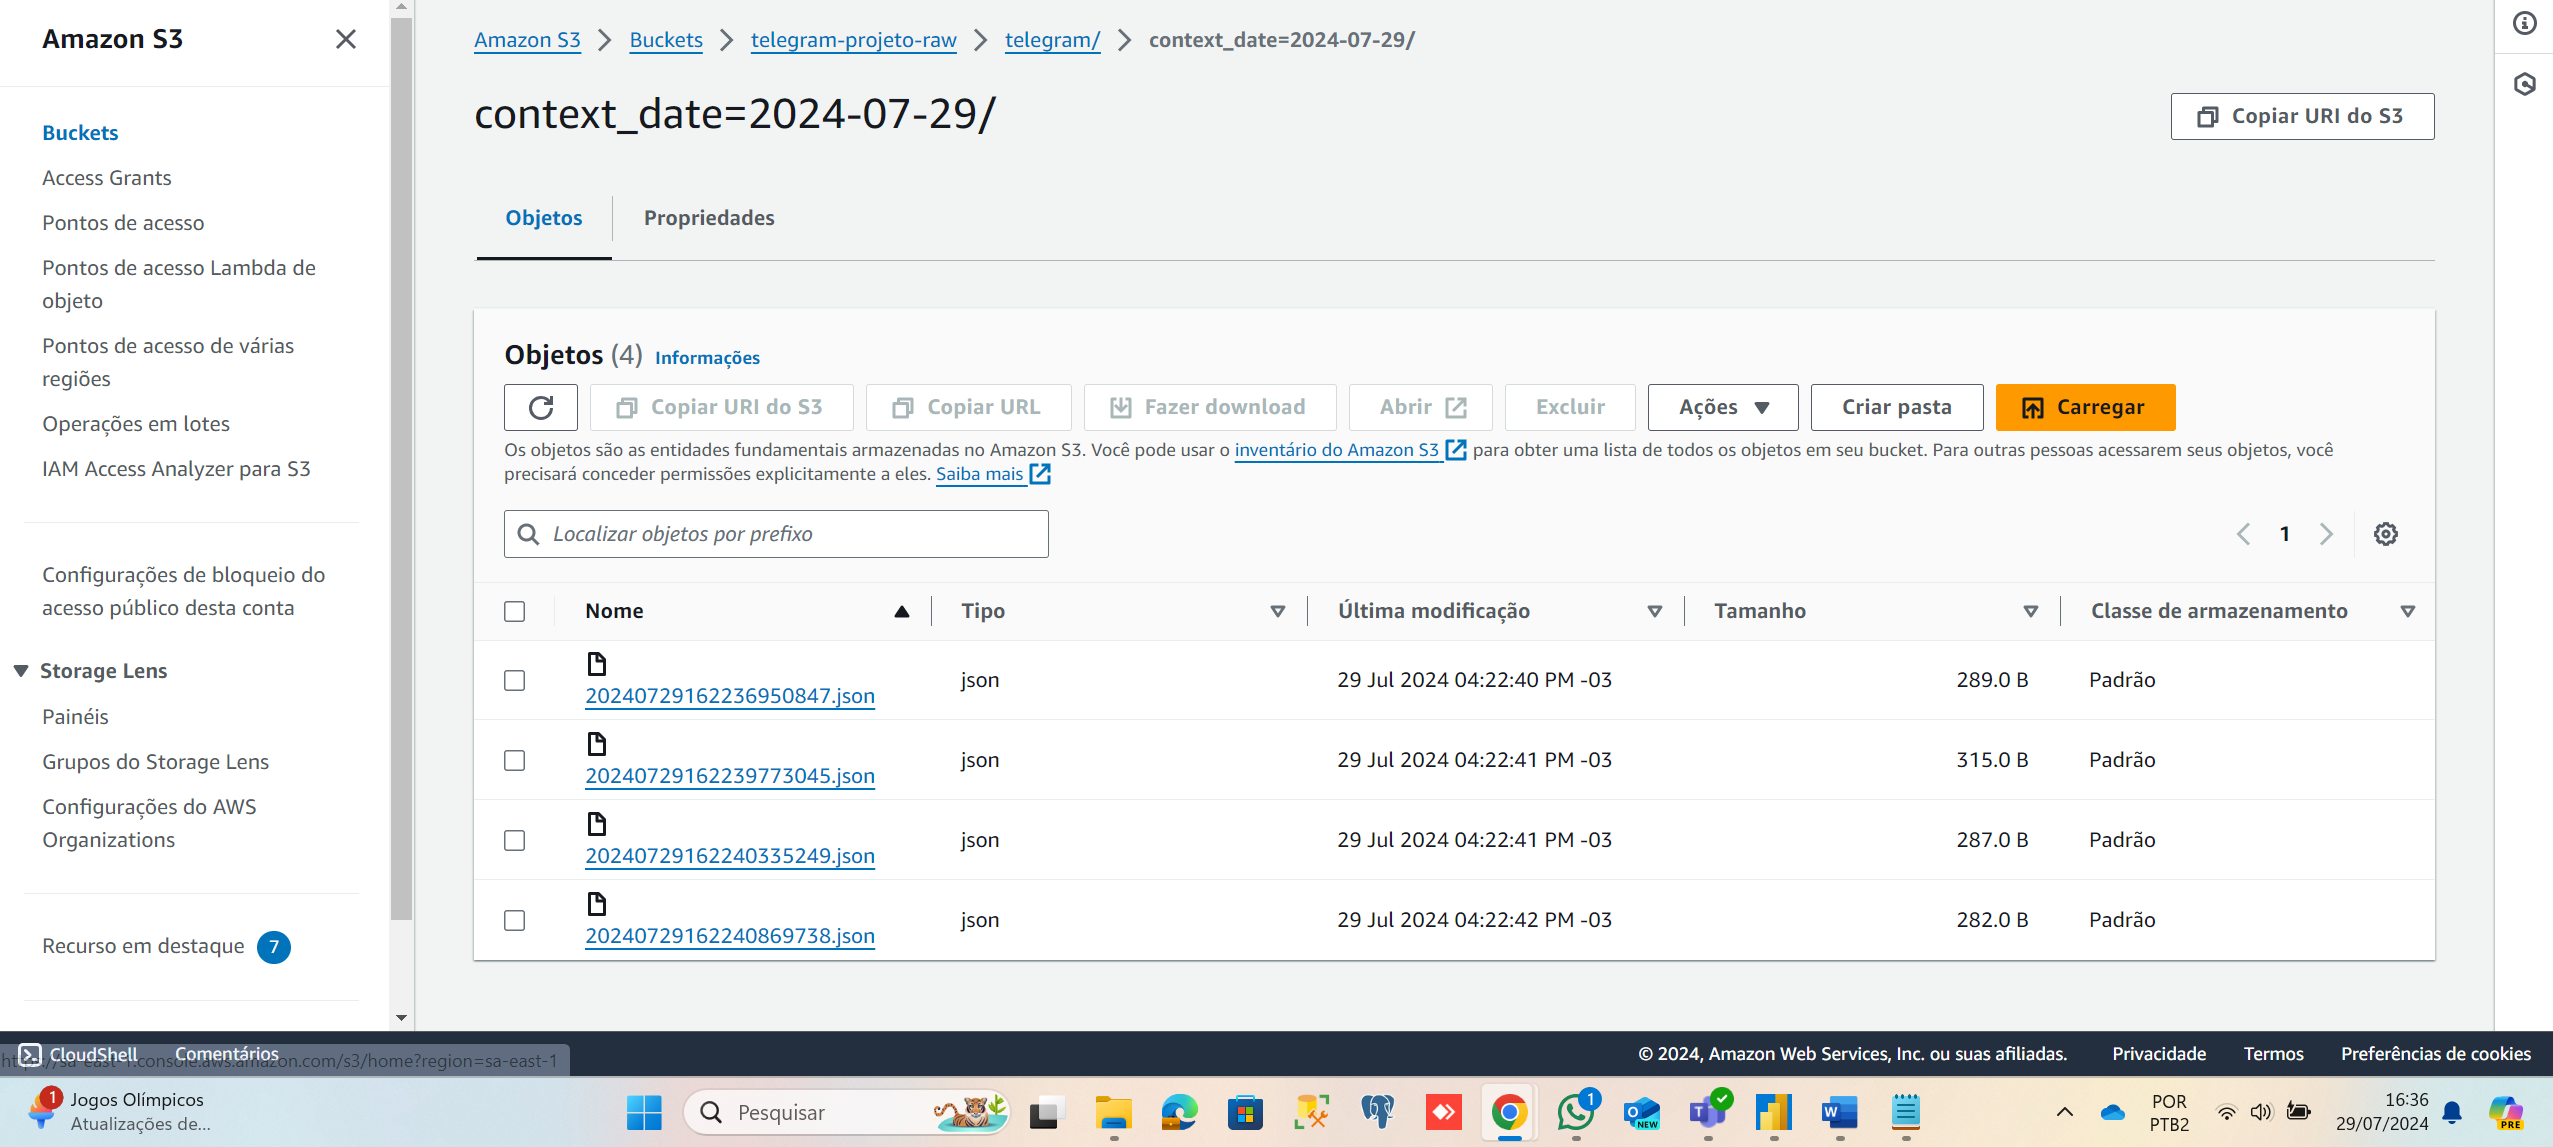

## 2\. ETL

Replique as atividades da aula 2.

2.1. Crie um `bucket` no `AWS S3` para o armazenamento de dados enriquecidos, não se esqueça de adicionar o sufixo `-enriched`.

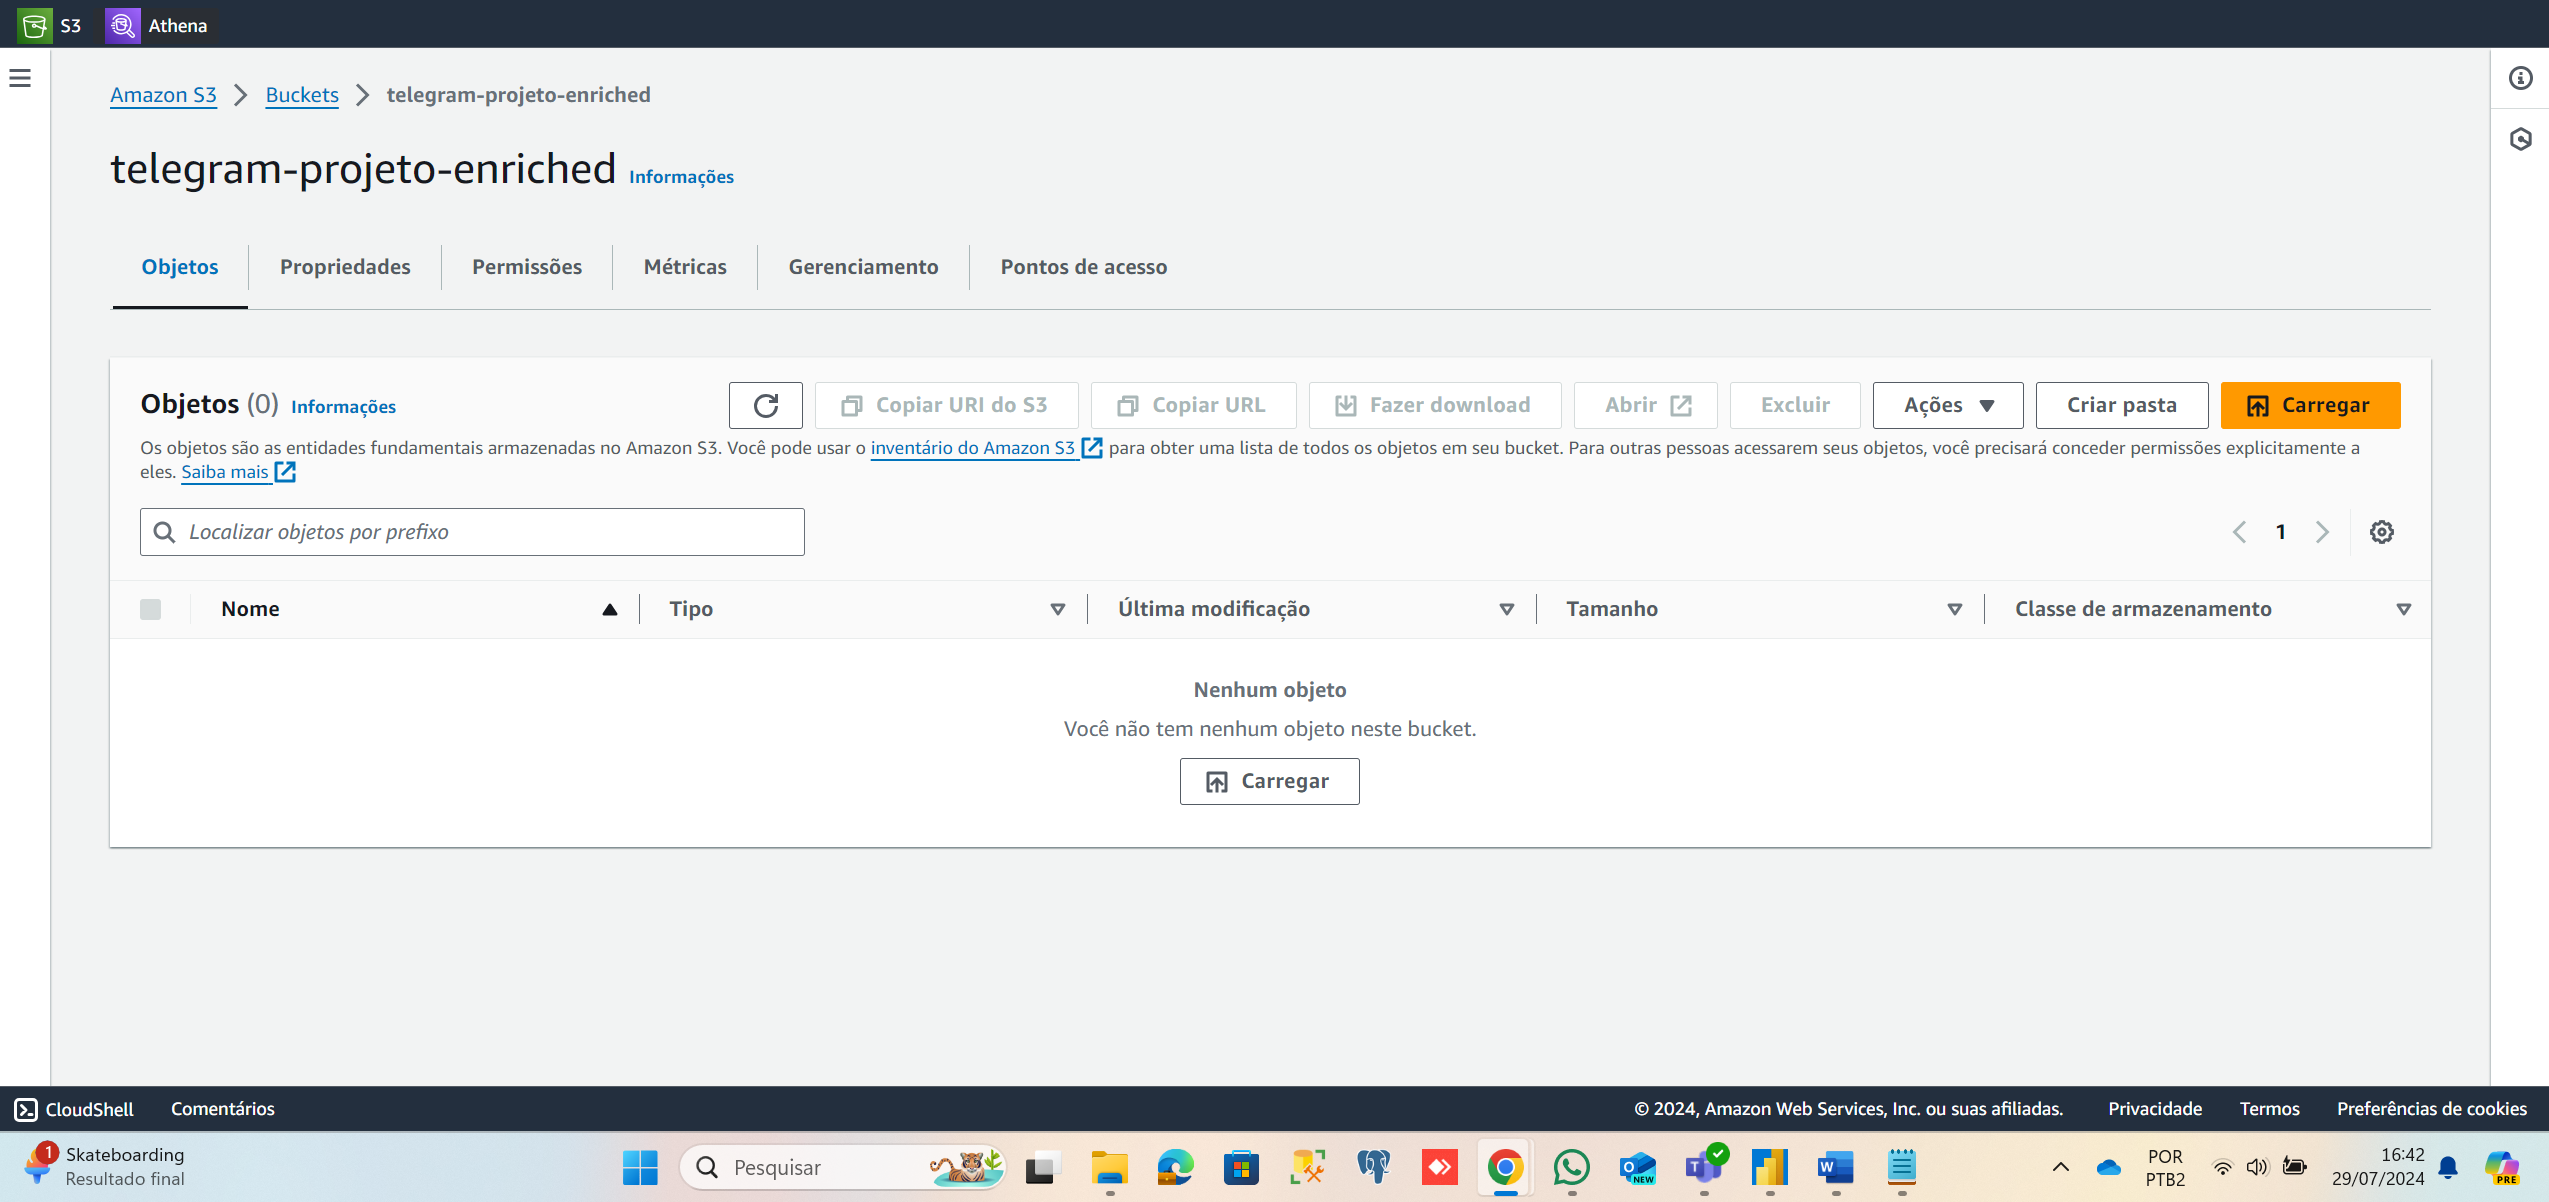

2.2. Cria uma função no `AWS Lambda` para processar as mensagens JSON de uma única partição do dia anterior (D-1), armazenadas no *bucket* de dados crus. Salve o resultado em um único arquivo PARQUET, também particionado por dia. Não se esqueça de configurar as variáveis de ambiente, de adicionar as permissão de interação com `AWS S3` no `AWS IAM`, de configurar o *timeout* e de adicionar a *layer* com o código do pacote Python PyArrow.

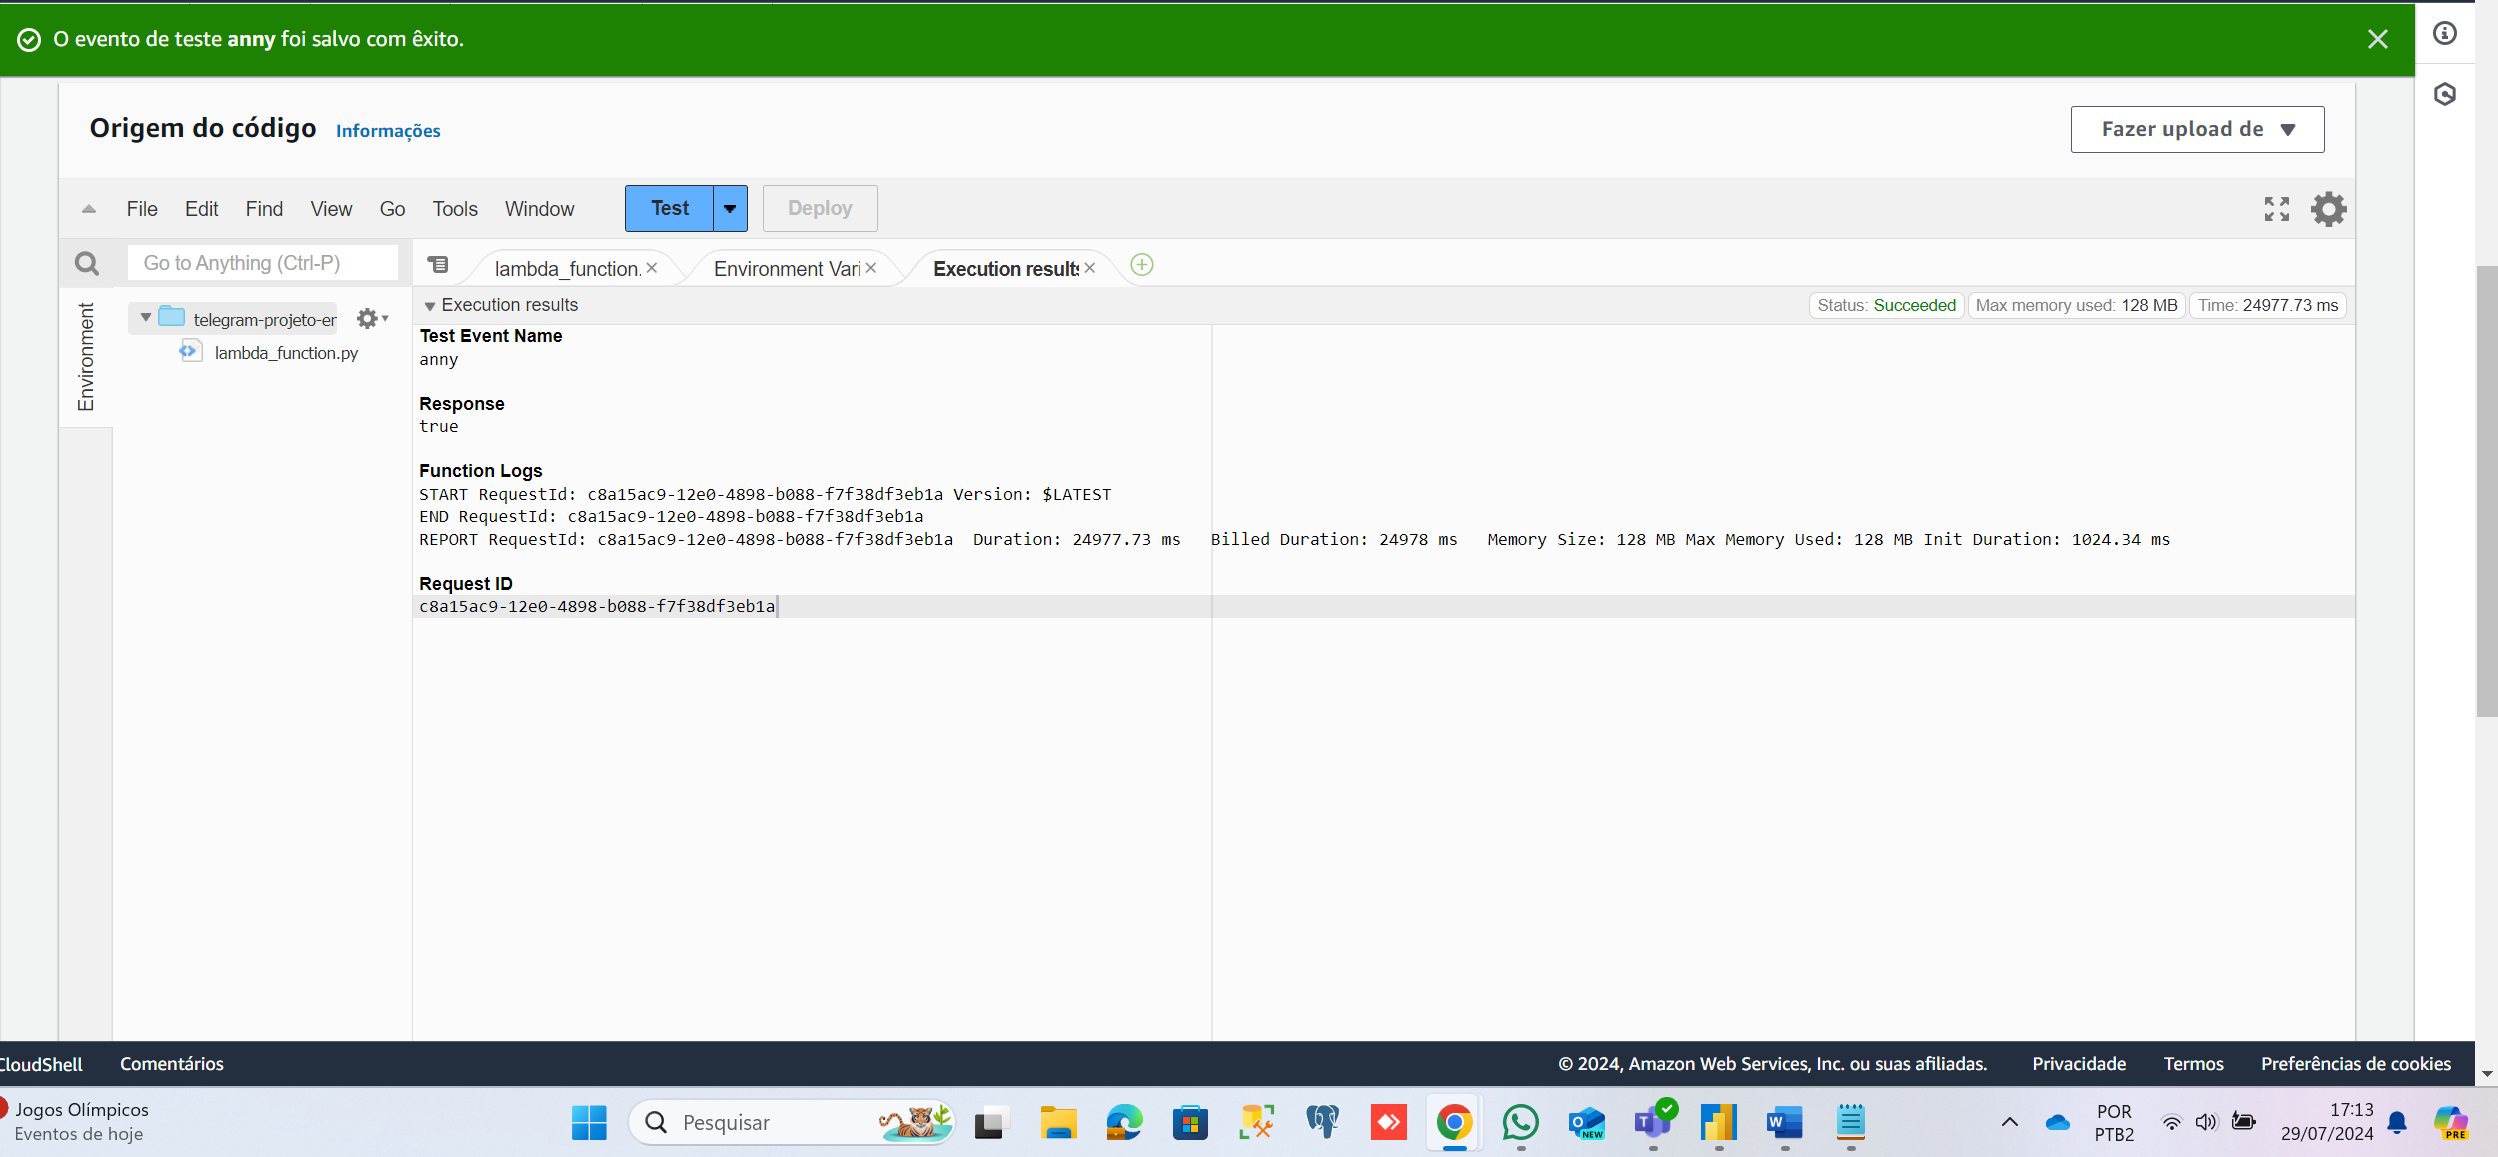

> **Nota**: Para testar a função, substitua o código `date = (datetime.now(tzinfo) - timedelta(days=1)).strftime('%Y-%m-%d')` por `date = (datetime.now(tzinfo) - timedelta(days=0)).strftime('%Y-%m-%d')`, permitindo assim o processamento de mensagens de um mesmo dia.

2.3. Crie uma regra no `AWS Event Bridge` para executar a função do `AWS Lambda` todo dia a meia noite no horário de Brasília (GMT-3).

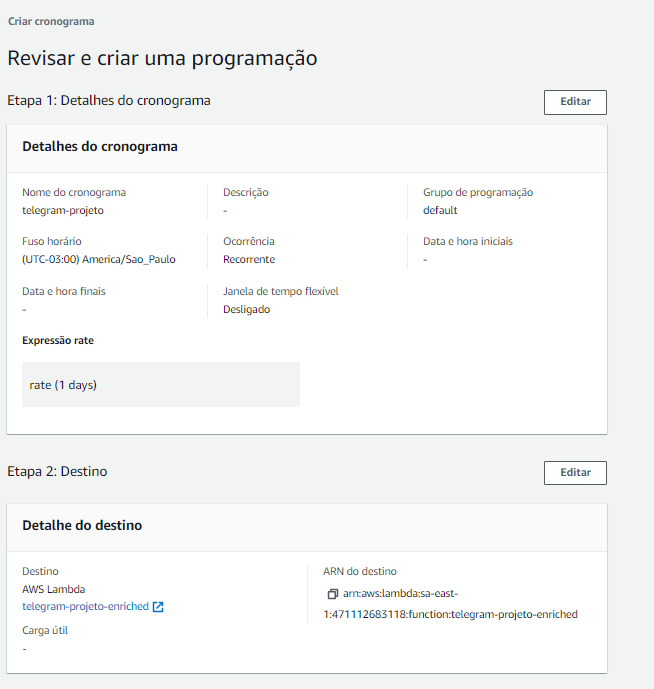

# ***Fiz as configurações, mas não ativei pra não correr o risco de esquecer***





## 3\. Apresentação

Replique as atividades da aula 3.

3.1. Cria a tabela no `AWS Athena` que aponte para os dados armazenados no bucket enriquecido do `AWS S3`.

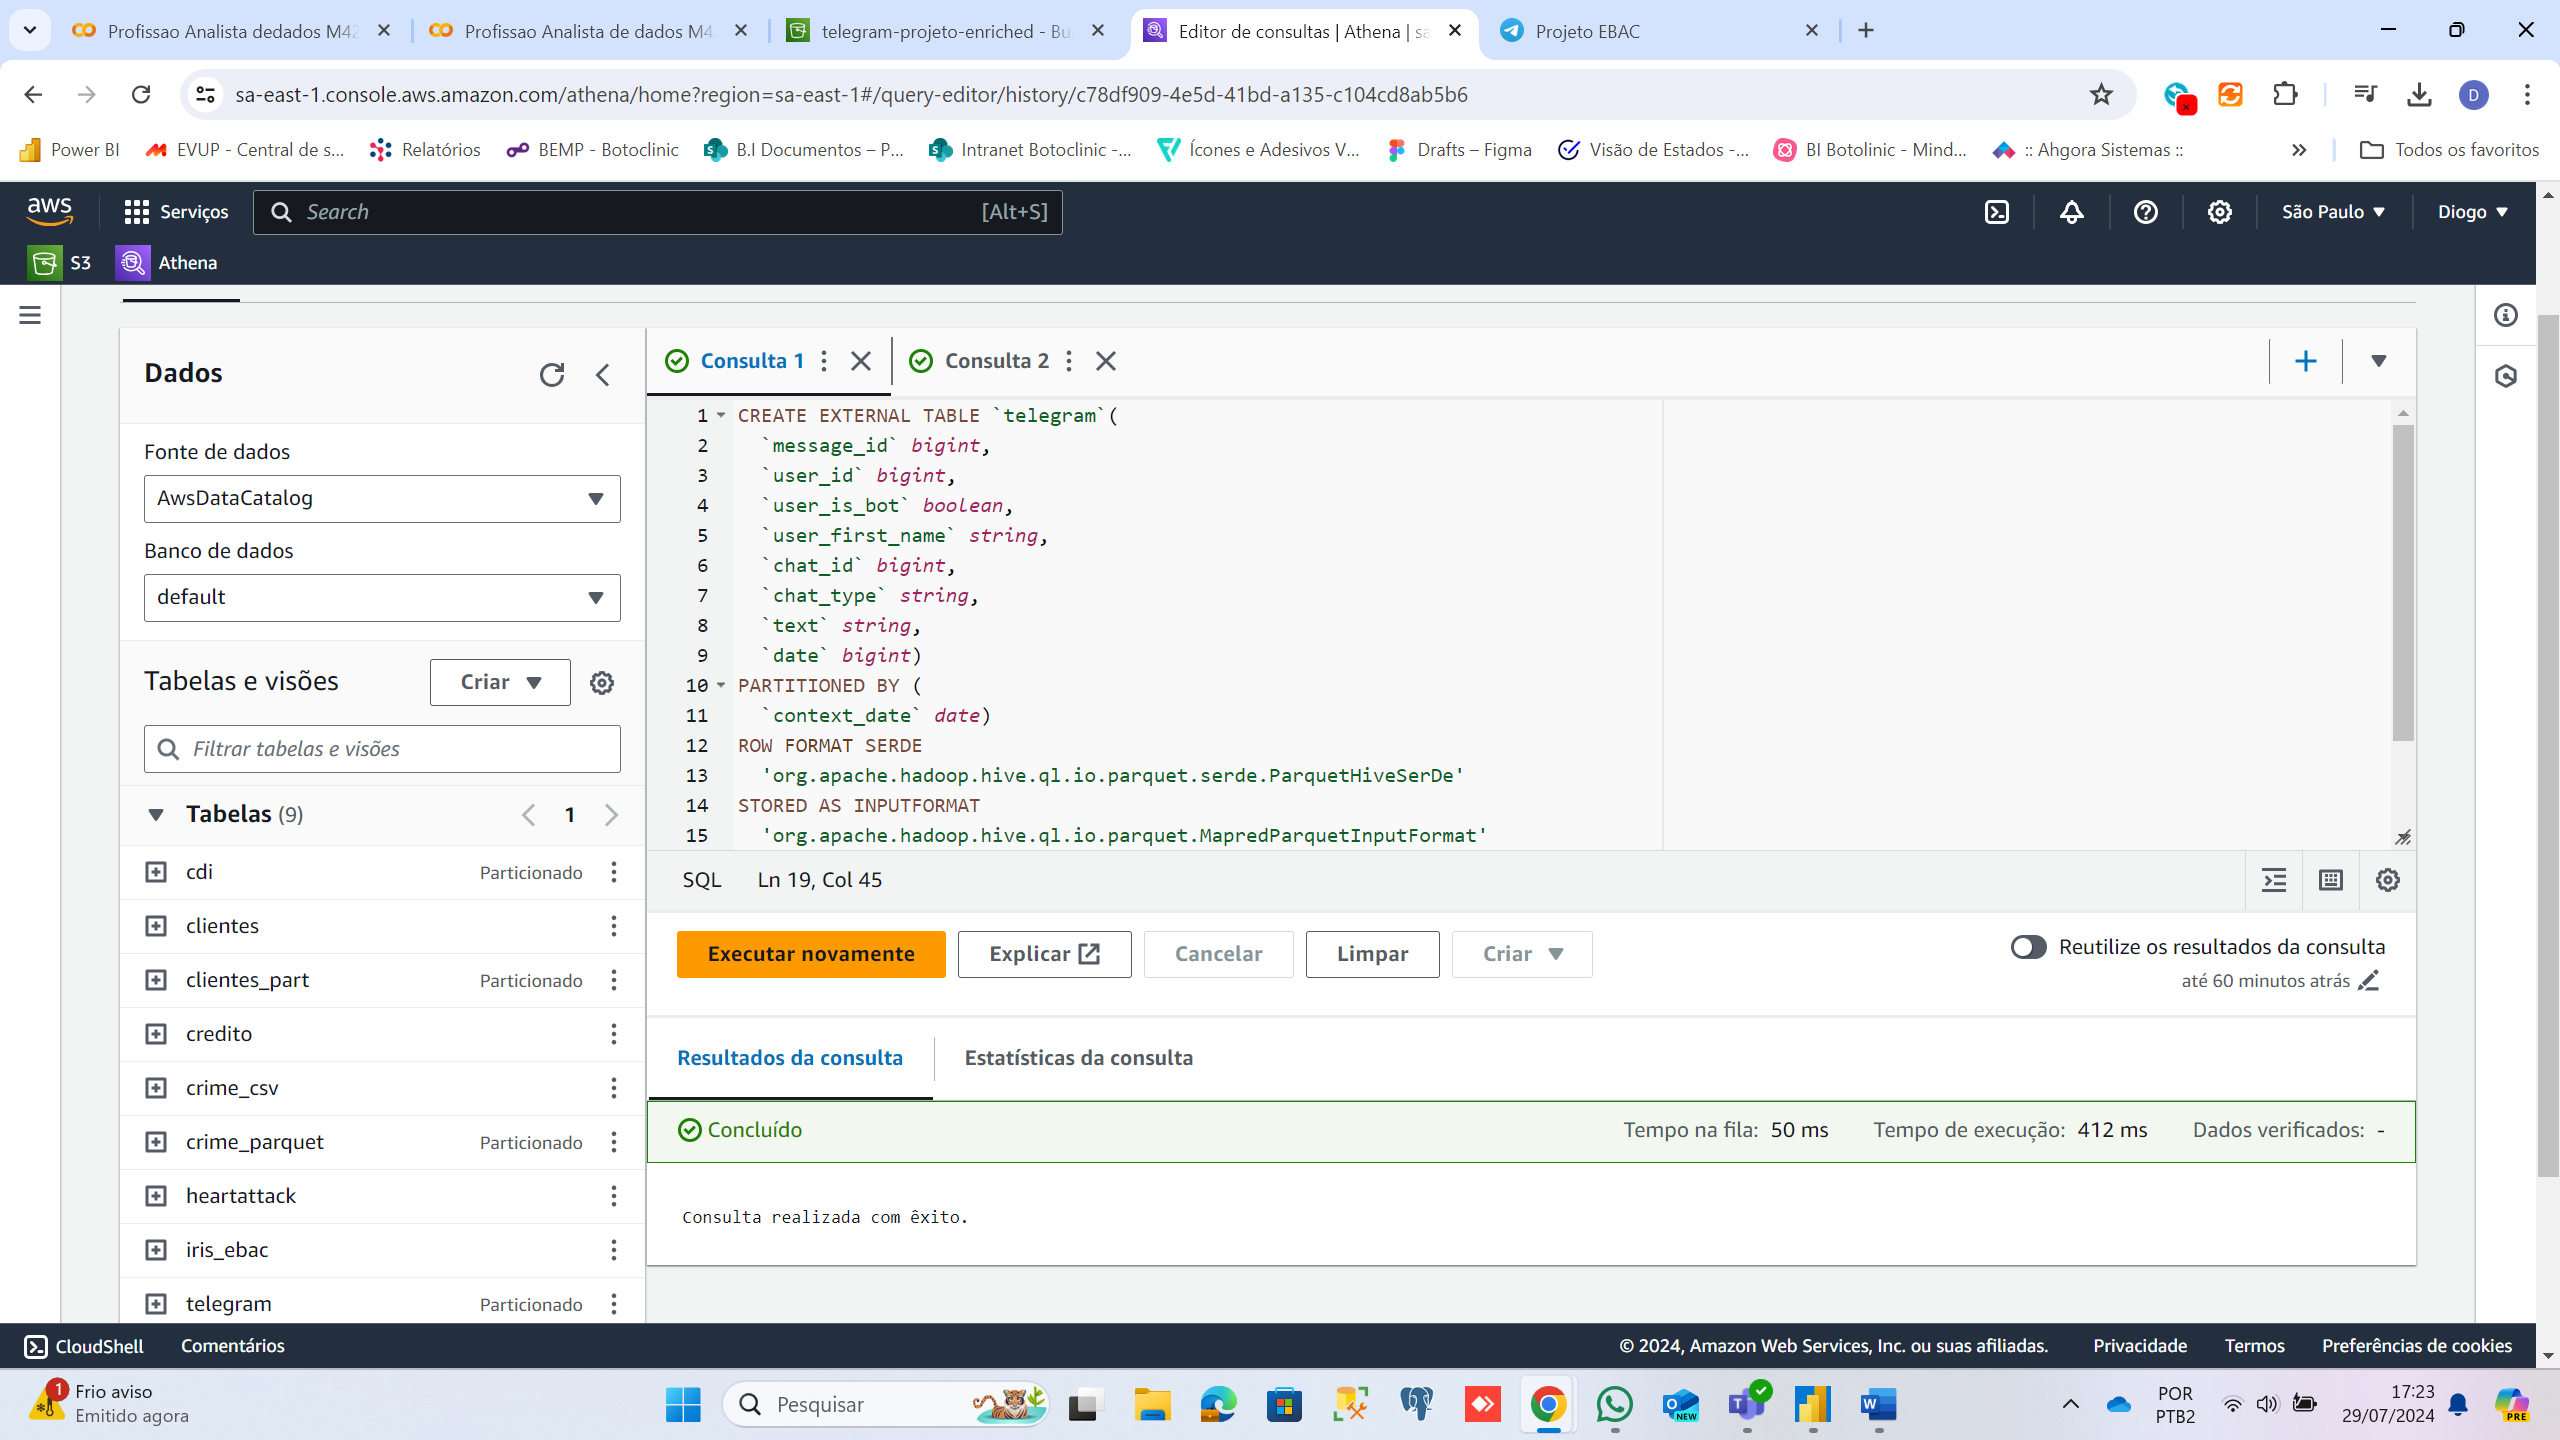

3.2. Execute o comando `MSCK REPAIR TABLE <nome-tabela>` para carregar as partições.

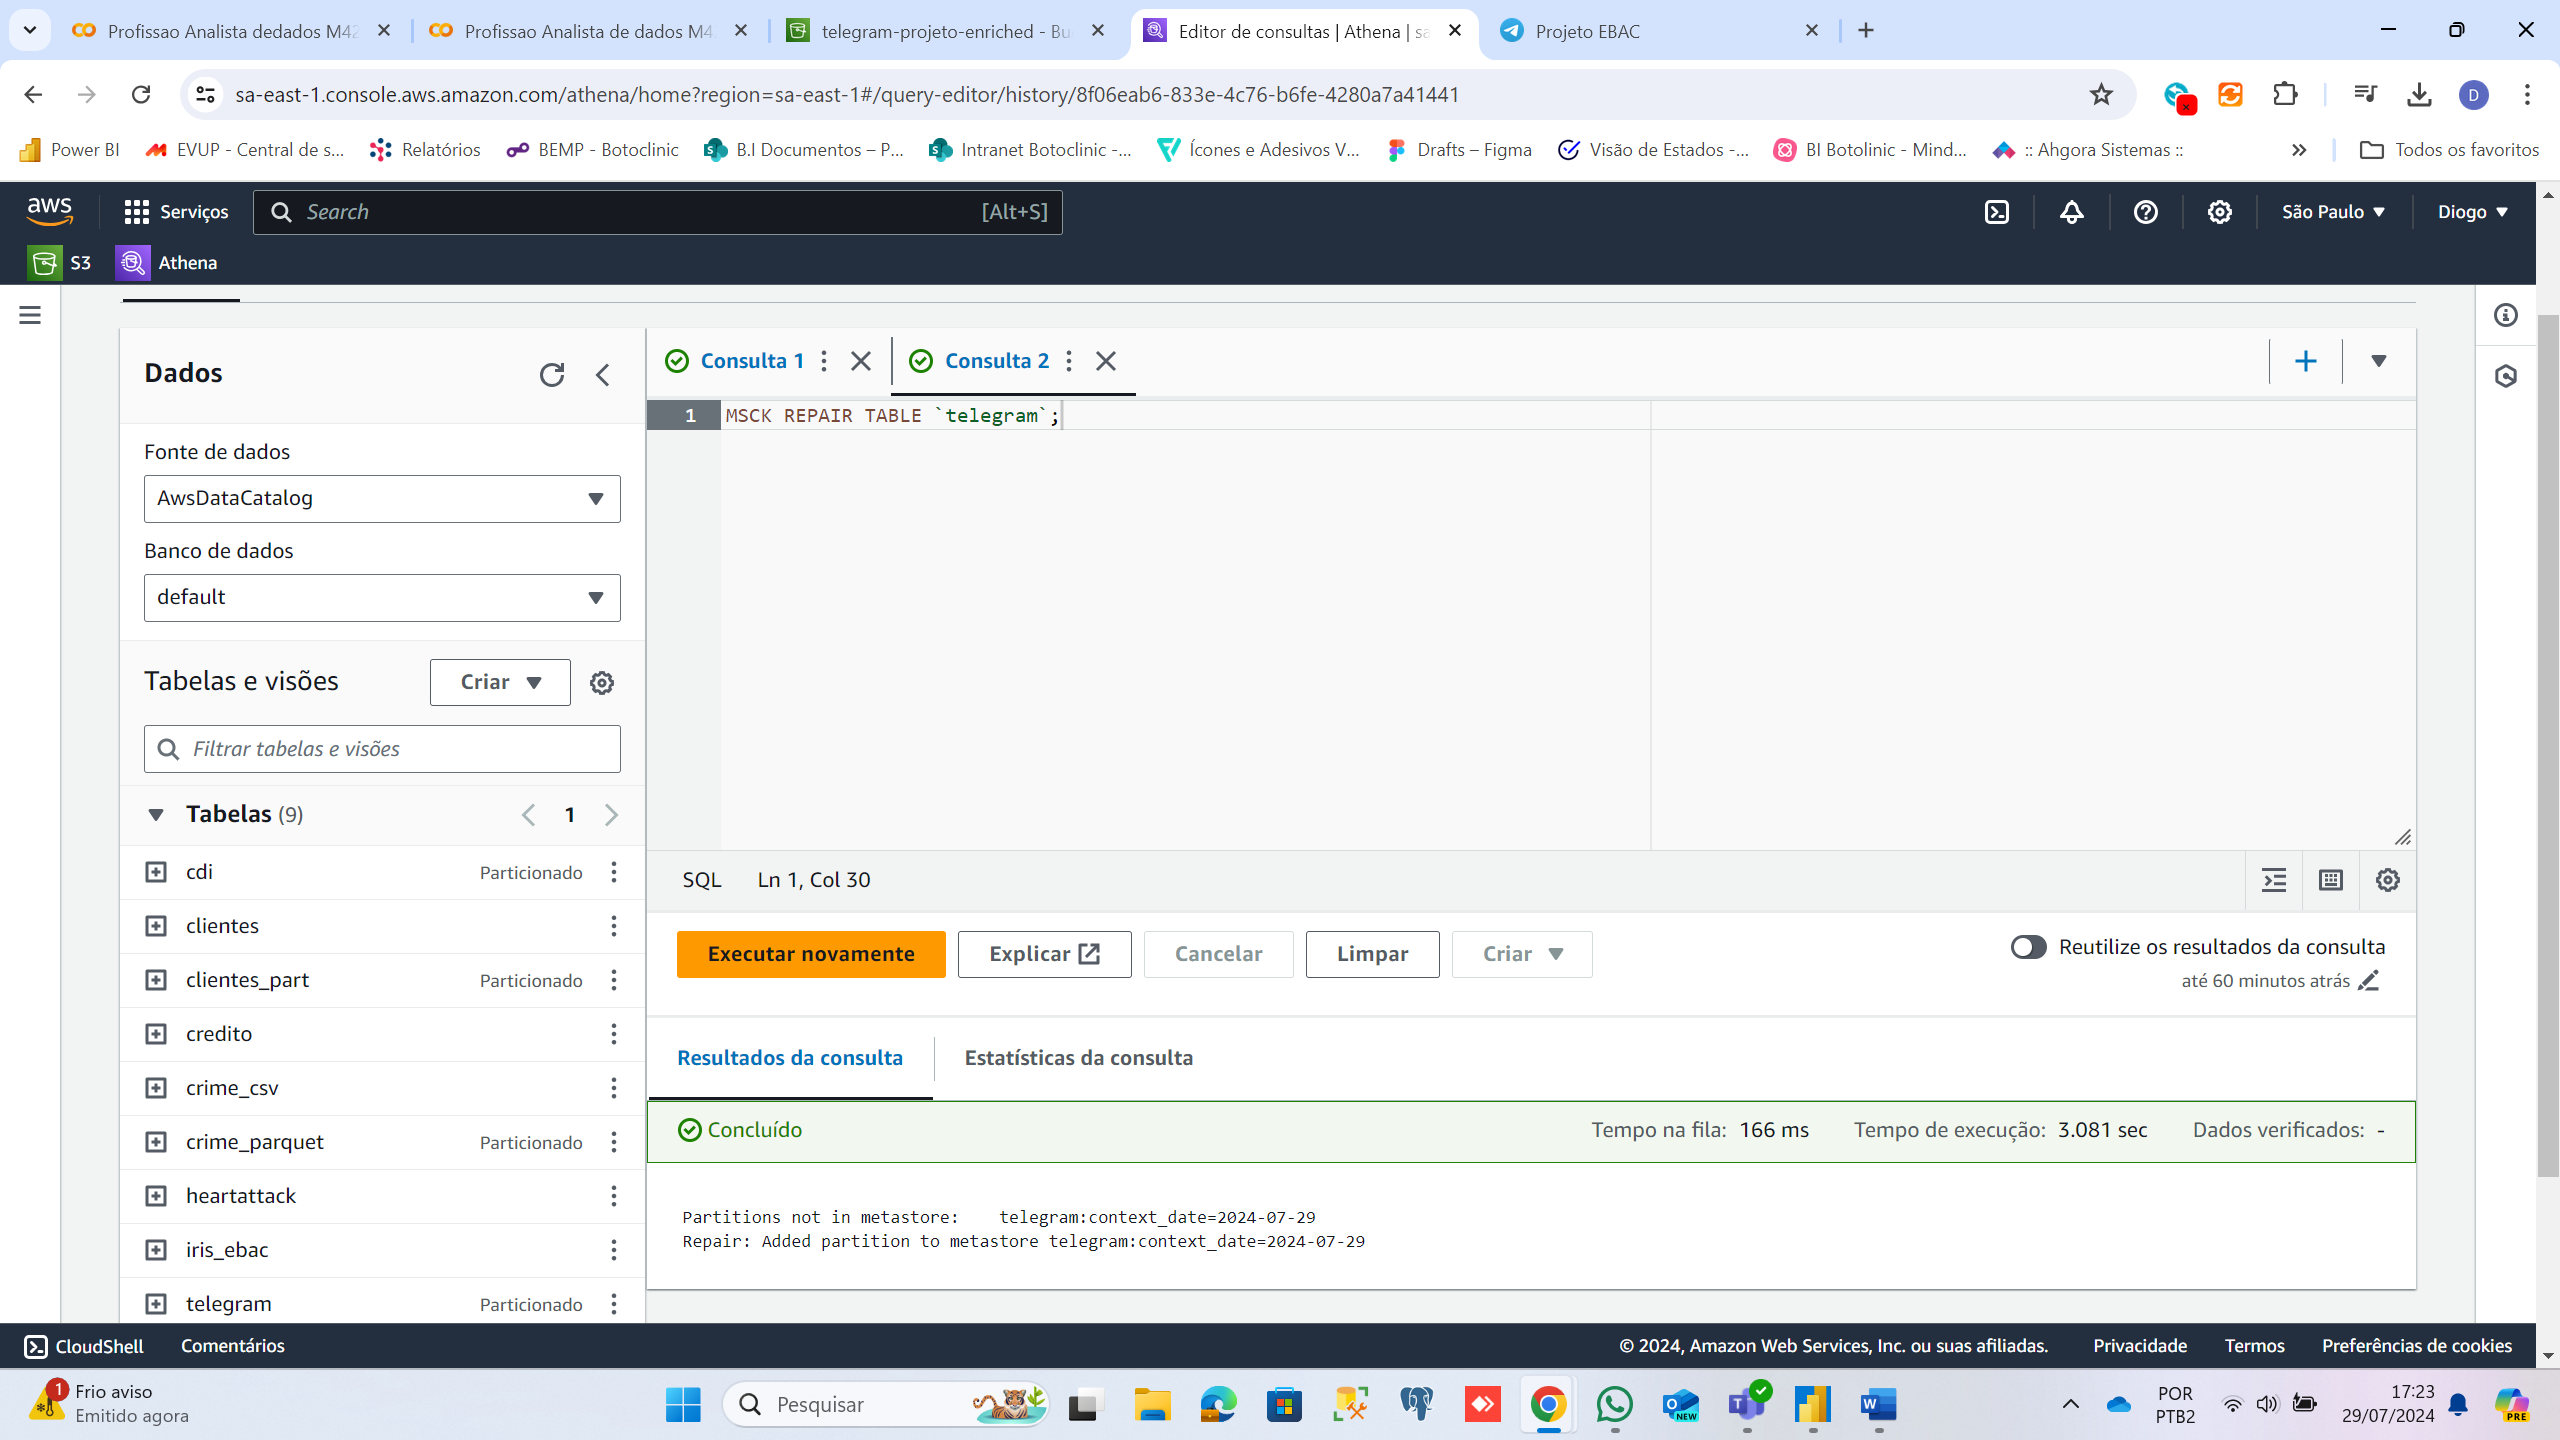

3.3. Execute as consultas SQL para explorar os dados.

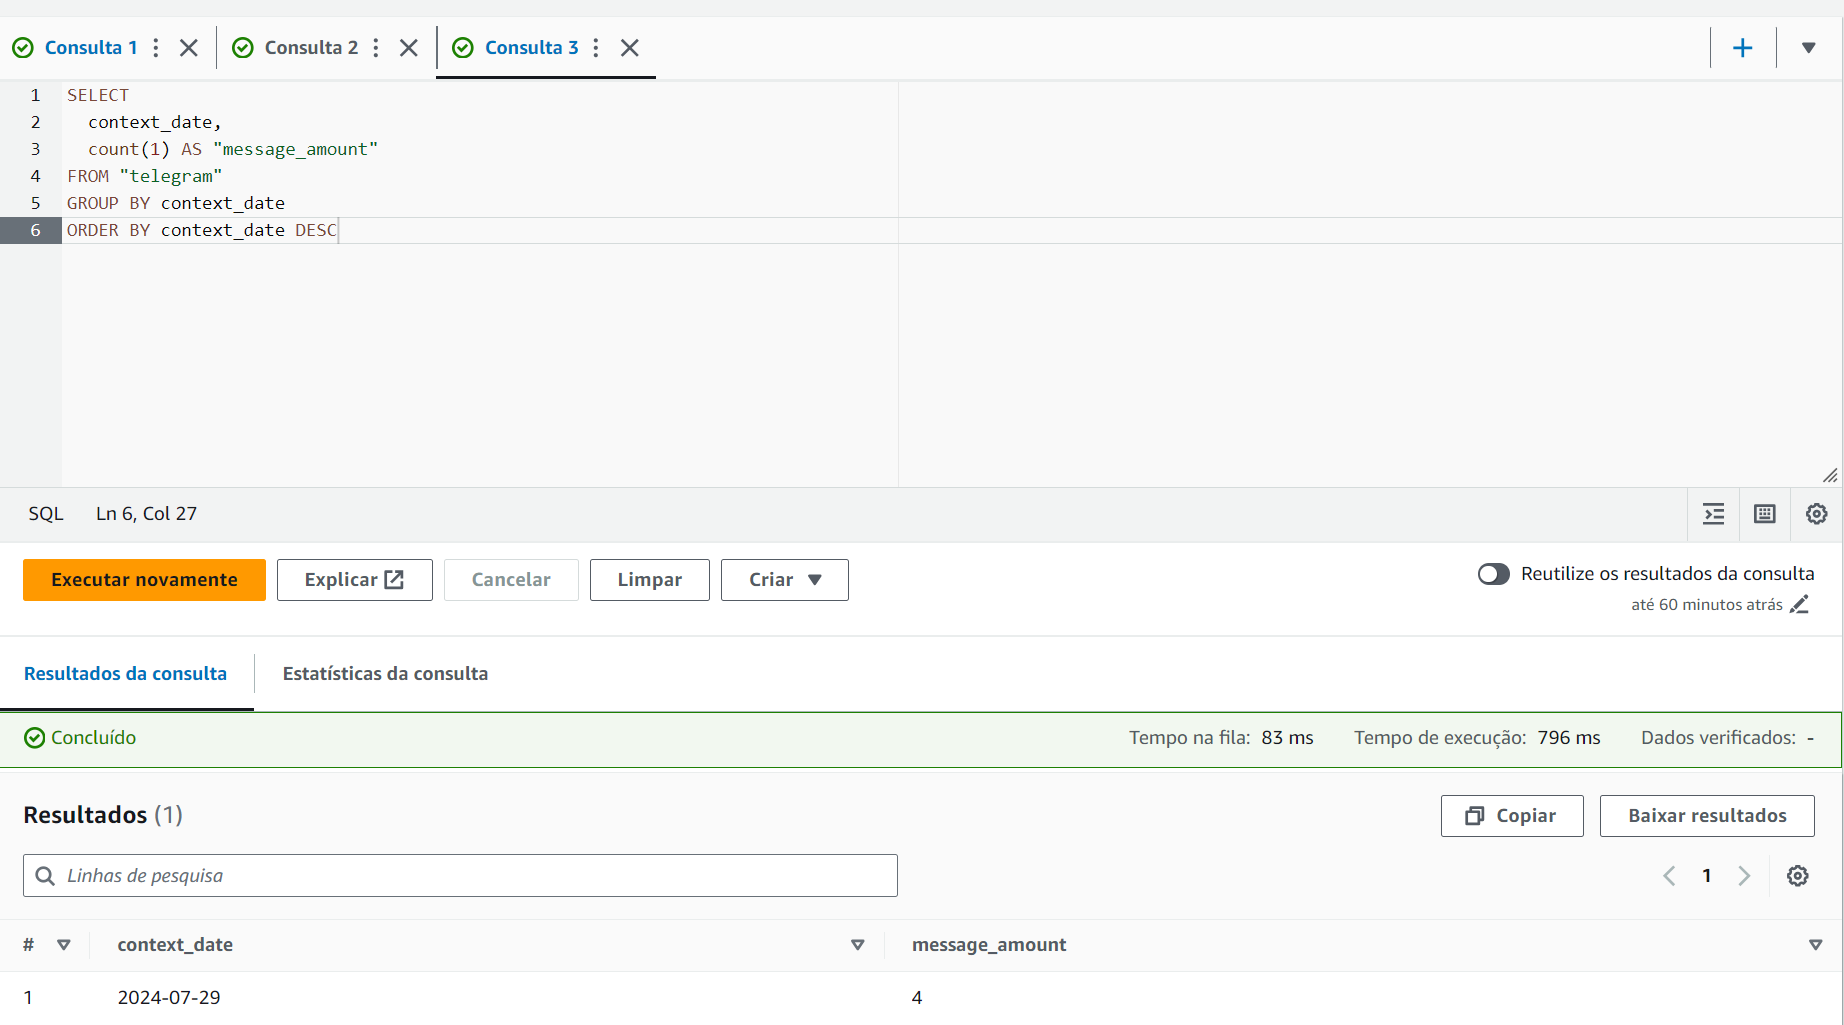

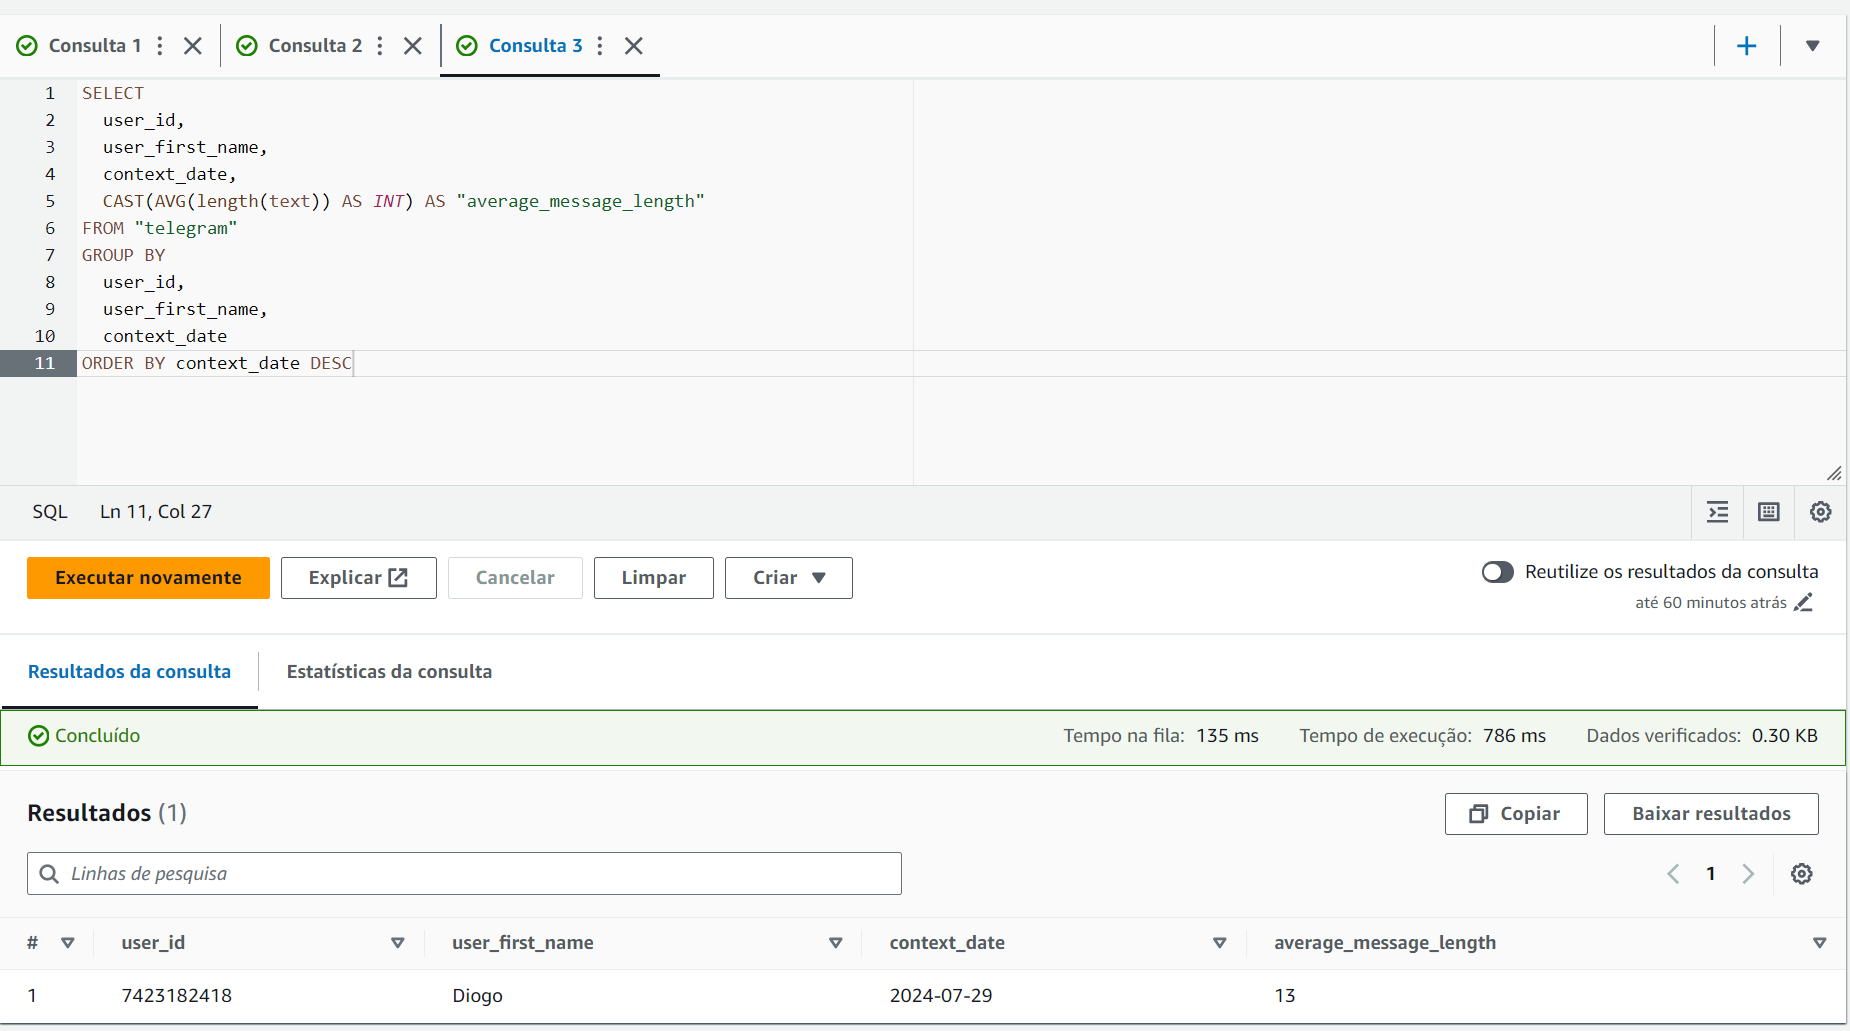

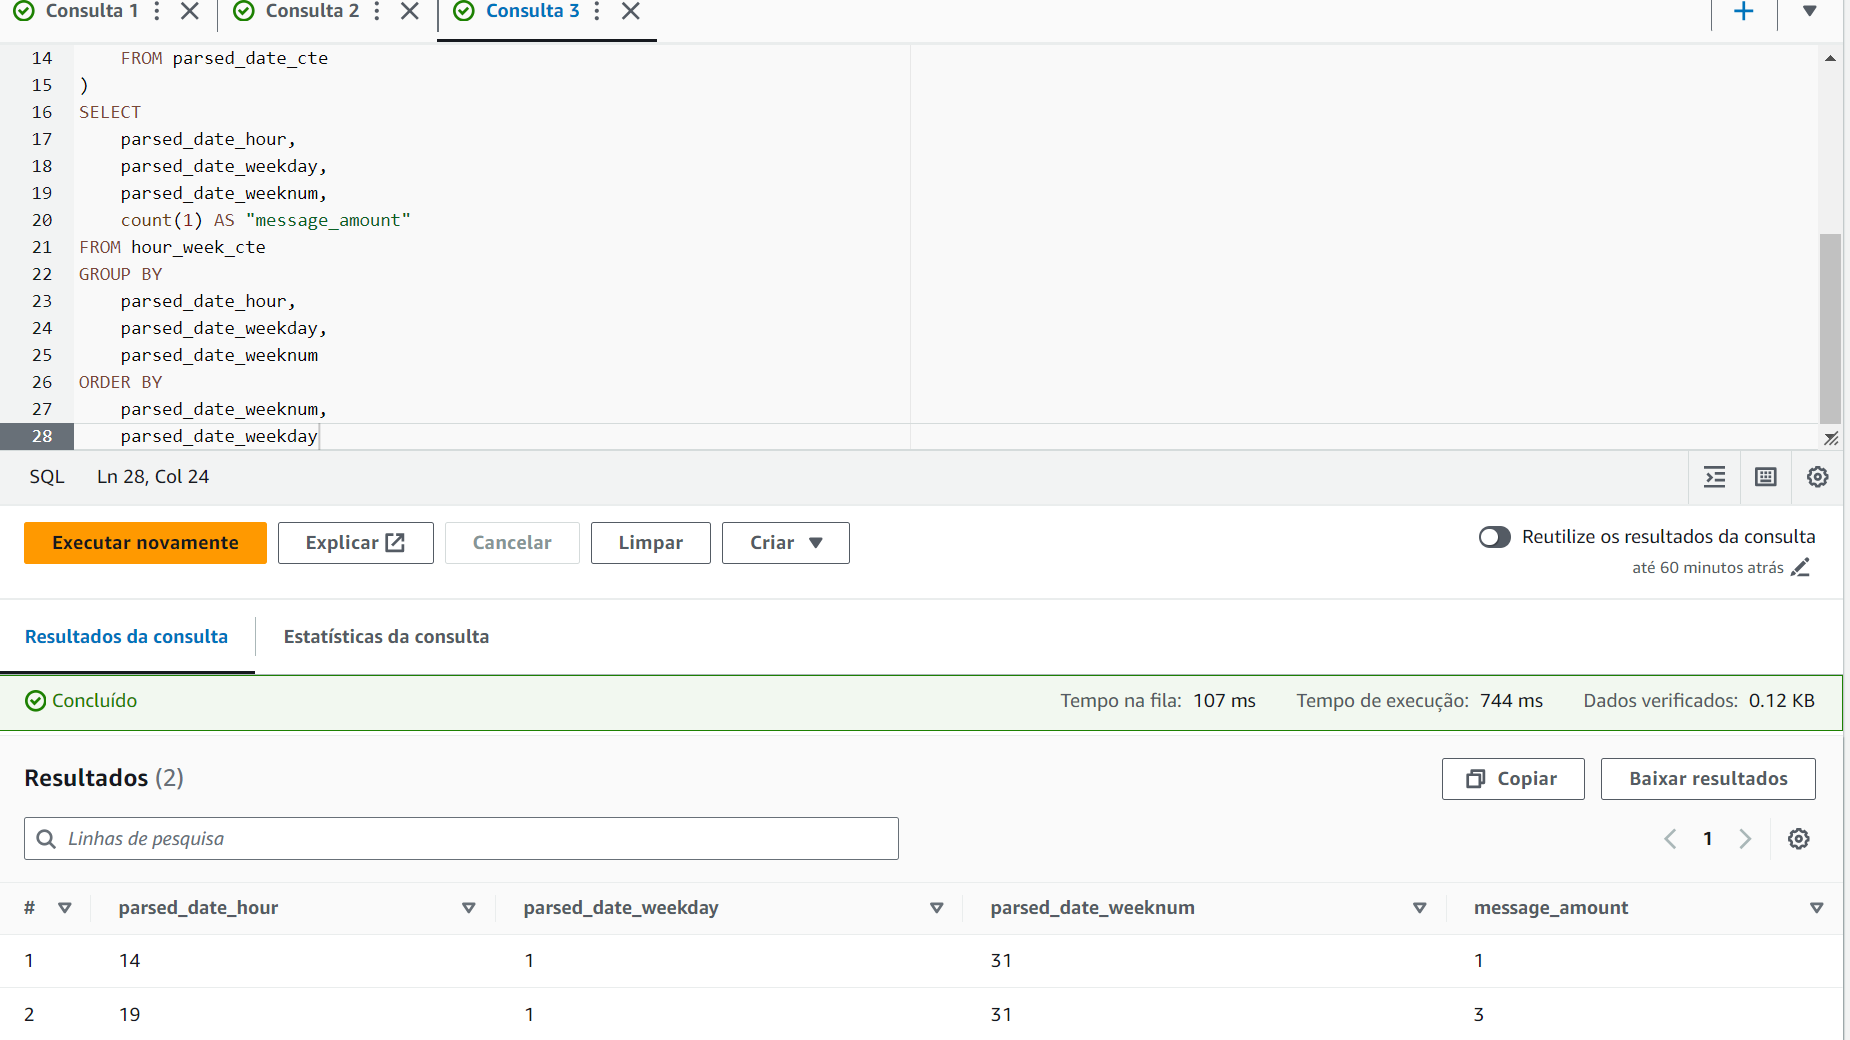

## 4\. Storytelling

Siga as dicas da aula 4 para expor o seu projeto.

In [ ]:
import pandas as pd


df = pd.read_csv('Telegram.csv')

# Verificar se o DataFrame foi carregado corretamente
print(df.head())  # Mostra as primeiras linhas do DataFrame

   message_id     user_id  user_is_bot user_first_name        chat_id  \
0           4  7423182418        False           Diogo -1002154771515   
1           5  7423182418        False           Diogo -1002154771515   
2           6  7423182418        False           Diogo -1002154771515   
3           7  7423182418        False           Diogo -1002154771515   

    chat_type                         text        date context_date  
0  supergroup                  Buenos dias  1722263159   2024-07-29  
1  supergroup  integração rodando full api  1722280894   2024-07-29  
2  supergroup                    teste API  1722280949   2024-07-29  
3  supergroup                         EBAC  1722280954   2024-07-29  


In [ ]:
print(df['context_date'].value_counts())

context_date
2024-07-29    4
Name: count, dtype: int64


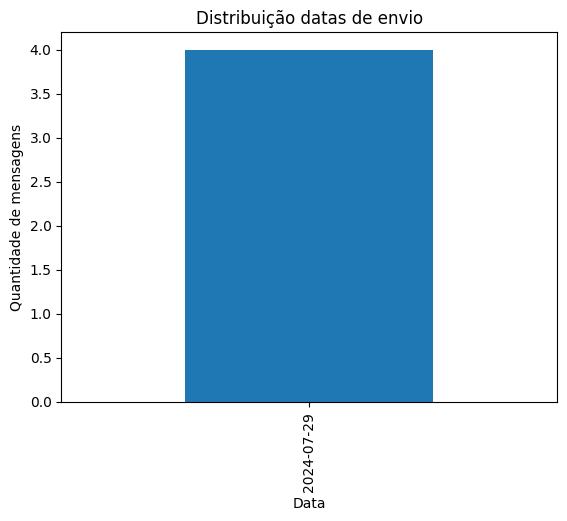

In [ ]:
import matplotlib.pyplot as plt

df['context_date'].value_counts().plot(kind='bar')
plt.xlabel('Data')
plt.ylabel('Quantidade de mensagens')
plt.title('Distribuição datas de envio')
plt.show()

[('Buenos', 1), ('dias', 1), ('integração', 1), ('rodando', 1), ('full', 1), ('api', 1), ('teste', 1), ('API', 1), ('EBAC', 1)]


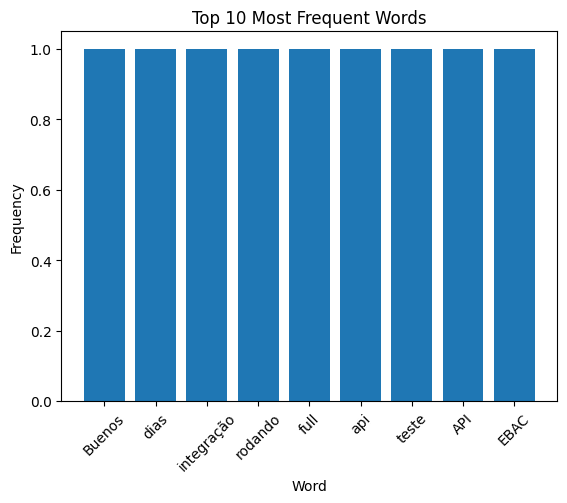

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from collections import Counter
import matplotlib.pyplot as plt



tokens = df['text'].apply(word_tokenize)


stop_words = set(stopwords.words('portuguese'))
tokens = tokens.apply(lambda x: [word for word in x if word.lower() not in stop_words])


word_freq = tokens.apply(Counter)


top_words = sum(word_freq.tolist(), Counter()).most_common(10)

print(top_words)


words, freqs = zip(*top_words)
plt.bar(range(len(top_words)), freqs)
plt.xticks(range(len(top_words)), words, rotation=45)
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

Com toda essa infraestrutura criada podemos criar algumas soluções no dia a dia das empresas para relacionamento com o cliente e entender o seu comportamento no dia a dia.

Exemplo de uso é monitorar conversas do SAC e entender as principais reclamações do cliente em conversas. Outro bom exemplo é pra uma central de suporte que atende chamados, podemos monitorar os horários que mais ocorrem para rastrear a raiz e corrigir o problema.

Enfim são possibilidades infinitas que conseguimos implementar a partir desse produto de dado, otimiza a eficiência operacional e oferece suporte estratégico para tomada de decisões. A aplicação de um pipeline de análise de dados desempenha um papel fundamental no cenário corporativo, fornecendo recursos para impulsionar inovação e excelência.